In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv(r"G:\traindata\forseal\train.csv")

In [5]:
train['date'] = pd.to_datetime(train['date'])#标准化日期格式
train['date'] = train['date'].dt.year.astype('str')+'-'+train['date'].dt.month.astype('str')+'-01'#将日期改为1号，方便汇总
train['date'] = pd.to_datetime(train['date'])
train = train.groupby('date').sales.sum().reset_index()#将每个月的销售数据加起来

In [6]:
train  = pd.DataFrame(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    60 non-null     datetime64[ns]
 1   sales   60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


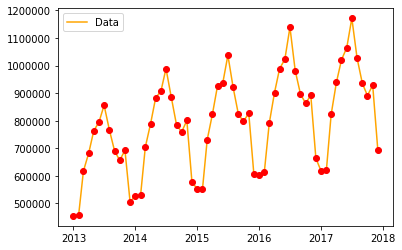

In [7]:
import matplotlib.pyplot as plt
# sorted(Ytest)
plt.plot(train['date'],train['sales'],c="orange",label= "Data")
plt.plot(train['date'],train['sales'],'ro')
# plt.plot(X,y,"ro")
# plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

In [8]:
# scaler = MinMaxScaler()
# scaler = scaler.fit(train.iloc[:, 1:])
# result = scaler.transform(train)
# result.head(10)

In [9]:
X = train['date']
# X = X.values.reshape(-1,1)
# X = pd.DataFrame(X)
# X.head(10)


In [10]:
X = X.apply(pd.to_datetime)
# X = X.values.reshape(-1,1)
X = X.map(dt.datetime.toordinal)
X = X.values.reshape(-1, 1)


In [11]:
y = train.iloc[:,-1]
# y.head(10)
y = y.values.reshape(-1, 1)
# y = pd.DataFrame(y)
# y.head(10)


In [12]:
# scler = MinMaxScaler()
# scaler = scaler.fit(y)
# result = scaler.transform(y)
# result
# Y = result

In [13]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=449)

In [14]:
# from sklearn.preprocessing import PolynomialFeatures
# x = []
# for i in range(2,51):
#         poly = PolynomialFeatures(degree=i,include_bias=False)#添加多项式回归，增加拟合程度
#         Xtrain_poly = poly.fit_transform(Xtrain)#分别对训练集和测试集进行处理
#         Xtest_poly = poly.fit_transform(Xtest)#
#         model = LinearRegression(normalize=True).fit(Xtrain_poly,Ytrain)
#         j = model.score(Xtest_poly,Ytest)
#         x.append(j)
# x
        

In [15]:
reg = LinearRegression().fit(Xtrain,Ytrain)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
reg.score(Xtrain,Ytrain)

0.3536921223438776

In [17]:
y_predict =reg.predict(Xtest)
y_predict

# LR.fit(Xtrain,Ytrain)
# LR.score(Xtest,Ytest)

array([[966902.08947575],
       [795692.71171063],
       [943887.05836636],
       [773239.02282339],
       [955488.13095808],
       [682114.46875608],
       [887191.49392611],
       [784278.75319296],
       [904218.87466559],
       [847336.19615126],
       [910019.41096145],
       [767438.48652753],
       [738810.03319633],
       [807106.6702283 ],
       [750411.10578805],
       [892804.91614789],
       [835735.12355953],
       [676313.93246019]])

In [18]:
y_hat = reg.predict(X)

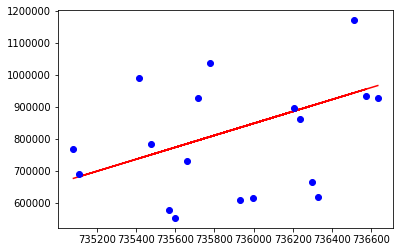

In [19]:
plt.plot(Xtest,y_predict,'r-')
plt.plot(Xtest,Ytest,'bo')
plt.show()

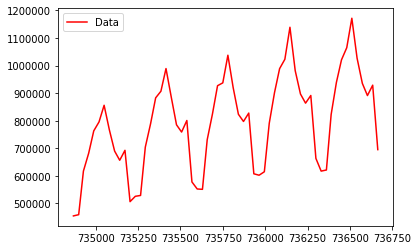

In [20]:
import matplotlib.pyplot as plt
sorted(Ytest)
# plt.plot(Xtrain,Ytrain,'bo')#c="black",label= "Data")
plt.plot(X,y,c="red",label= "Data")
# plt.plot(X,y,"ro")
# plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

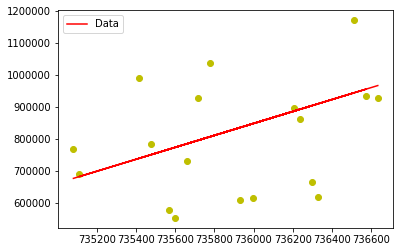

In [31]:
import matplotlib.pyplot as plt
# sorted(Ytest)
plt.plot(Xtest,Ytest,"yo")
plt.plot(Xtest,y_predict,c="red",label= "Data")
# plt.plot(X,y,"ro")
# plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

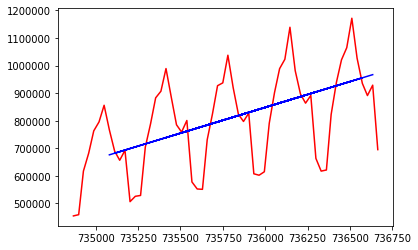

In [22]:
plt.plot(X,y,'r-')
plt.plot(Xtest,y_predict,'b-')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

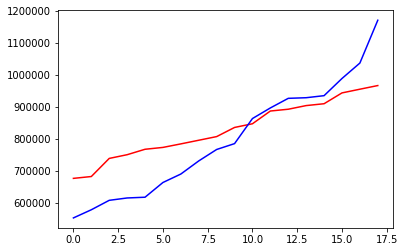

In [23]:
plt.plot(range(len(y_predict)),sorted(y_predict),'r-',label = 'predict')
plt.plot(range(len(Ytest)),sorted(Ytest),'b-',label = 'data')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

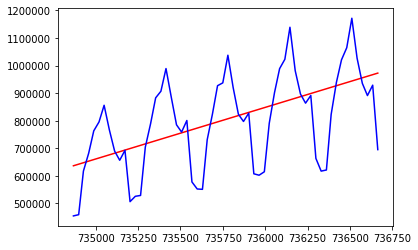

In [27]:
plt.plot(X,y_hat,'r-')
plt.plot(X,y,'b-')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

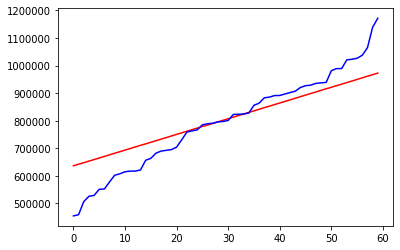

In [28]:
plt.plot(range(len(y_hat)),sorted(y_hat),'r-',label = 'predict')
plt.plot(range(len(y)),sorted(y),'b-',label = 'data')
plt.show

In [25]:
reg_coef = reg.coef_     #截距
reg_intercept = reg.intercept_ #斜率
today= input()

 333626


In [ ]:
prediction = reg_coef*int(today)+reg_intercept
prediction